<a href="https://colab.research.google.com/github/aktrikx/DSprojects/blob/main/Food_order_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


time 46 sec or 0.77 mins


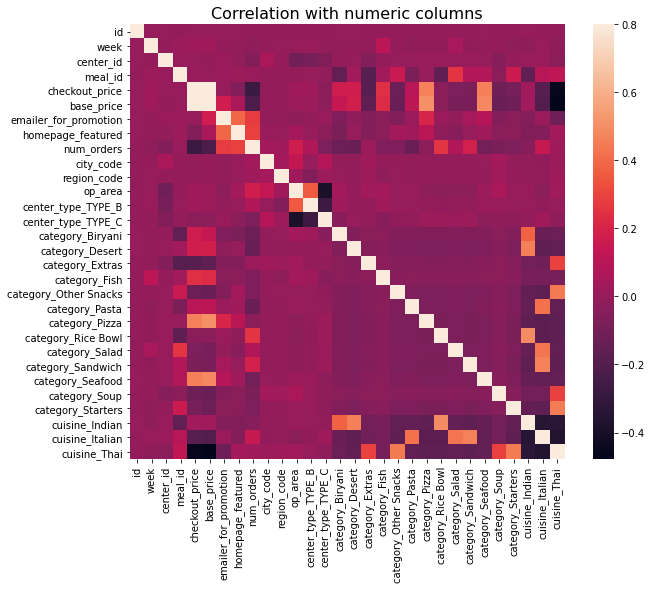

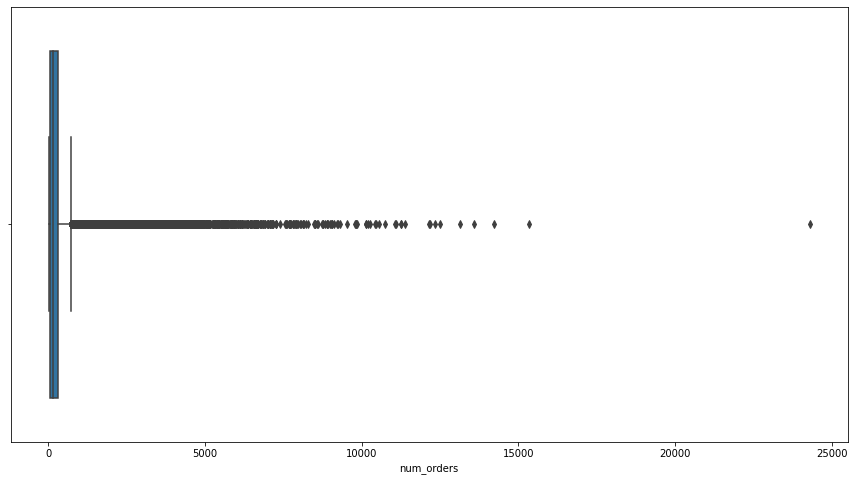

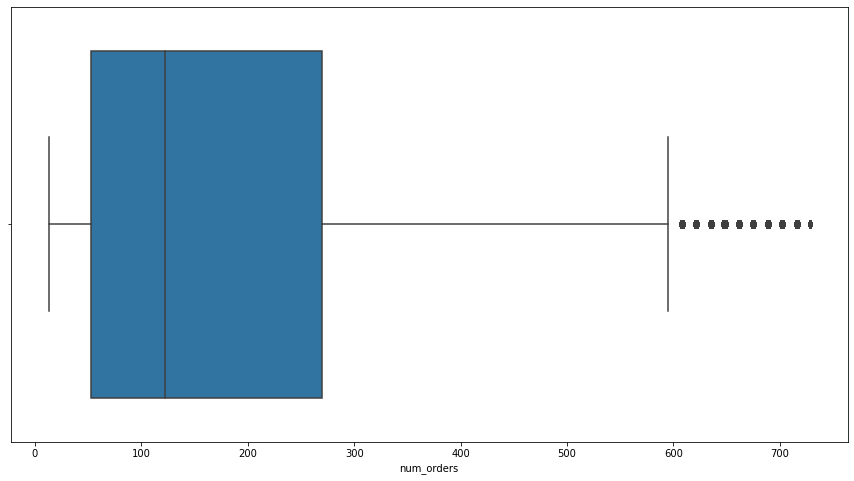

In [ ]:
%matplotlib inline
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score
import numpy as np
from sklearn.model_selection import StratifiedKFold  #for classifier
from sklearn.model_selection import KFold #for regression
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import train_test_split
from sklearn import metrics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
t1=time.time()
train=pd.read_csv('/content/drive/My Drive/food/train.csv')
train2=pd.read_csv('/content/drive/My Drive/food/fulfilment_center_info.csv')
train3=pd.read_csv('/content/drive/My Drive/food/meal_info.csv')
test1=pd.read_csv('/content/drive/My Drive/food/test.csv')

def plot1():  
  # Predict
  pred1 = model.predict(x_train)
  pred = model.predict(x_test)

  # Measure MSE error.
  print("For Train Model")  
  score = metrics.mean_squared_error(y_train,pred1)
  print("Final score (MSE): {}".format(score))
  # Measure RMSE error.  RMSE is common for regression.
  score = np.sqrt(metrics.mean_squared_error(y_train,pred1))
  print("Final score (RMSE): {}".format(score))
  print("Final score (R^2):",metrics.r2_score(y_train,pred1))

  print("For Test Model")
  # Predict

  # Measure MSE error.  
  score = metrics.mean_squared_error(y_test,pred)
  print("Final score (MSE): {}".format(score))
  # Measure RMSE error.  RMSE is common for regression.
  score = np.sqrt(metrics.mean_squared_error(y_test,pred))
  print("Final score (RMSE): {}".format(score))
  print("Final score (R^2):",metrics.r2_score(y_test,pred))


  fig = plt.figure()
  ax1 = fig.add_subplot(111)

  ax1.scatter(y_train,pred1, s=10, c='b', label='Train Data')
  ax1.scatter(y_test,pred, s=10, c='r', label='Test Data')
  plt.xlabel('True values')
  plt.ylabel('Predictions')
  plt.legend(loc='upper left');
  plt.show()

# missing= train3.isnull().sum()
# missing=(missing[missing>0]).sort_values(ascending=False)
# missing
my=train.merge(train2)
train1=my.merge(train3)
my2=test1.merge(train2)
test2=my2.merge(train3)
df1=train1
df2=test2
catogorical_features1=df1.select_dtypes(include=[np.object])
for feature in catogorical_features1.columns:
  df1 = pd.concat([df1,pd.get_dummies(df1[feature],prefix=feature,drop_first=True)],axis=1)
  df1.drop(feature, axis=1, inplace=True)
catogorical_features2=df2.select_dtypes(include=[np.object])
for feature in catogorical_features2.columns:
  df2 = pd.concat([df2,pd.get_dummies(df2[feature],prefix=feature,drop_first=True)],axis=1)
  df2.drop(feature, axis=1, inplace=True) 

correlation=df1.corr()
f,ax=plt.subplots(figsize=(10,8))
plt.title('Correlation with numeric columns',y=1,size=16)
sns.heatmap(correlation,square=True,vmax=0.8)

#Removing feature using correlation higer than 0.9
columns = np.full((correlation.shape[0],), True, dtype=bool)
for i in range(correlation.shape[0]):
    for j in range(i+1, correlation.shape[0]):
        if correlation.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False
selected_columns = df1.columns[columns]
data = df1[selected_columns]
datano=data.drop('num_orders',axis=1)
datayes=pd.DataFrame(data['num_orders'])

#Feature selection using p test
selected_columns = datano.values
import statsmodels.regression.linear_model as sm
def backwardElimination(x, Y, sl, columns):
    numVars = len(x[0])
    for i in range(0, numVars):
        # regressor_OLS = sm.ols(Y, x).fit()
        regressor_OLS = sm.OLS(endog = Y, exog = x).fit()
        maxVar = max(regressor_OLS.pvalues).astype(float)
        if maxVar > sl:
            for j in range(0, numVars - i):
                if (regressor_OLS.pvalues[j].astype(float) == maxVar):
                    x = np.delete(x, j, 1)
                    columns = np.delete(columns, j)
                    
    regressor_OLS.summary()
    return x, columns
SL = 0.05
data_modeled, selected_columns = backwardElimination(datano.values, datayes.values, SL, datano.columns)

data = pd.DataFrame(data = data_modeled, columns = selected_columns)
data['num_orders']=datayes['num_orders']
plt.figure(figsize=(15,8))
sns.boxplot(data['num_orders'])
Q1=data['num_orders'].quantile(.25)
Q3=data['num_orders'].quantile(.75)
IQR=Q3-Q1
new_boundary=Q3+1.5*IQR
data.drop(data[data['num_orders']>=new_boundary].index,axis=0,inplace=True)
plt.figure(figsize=(15,8))
sns.boxplot(data['num_orders'])

train4=data.drop(['id','num_orders','cuisine_Indian','cuisine_Thai'],axis=1)
test2=df2.drop(['id'],axis=1)
target=data['num_orders']

test3=test2.drop(['base_price', 'category_Salad', 'category_Seafood','cuisine_Indian','cuisine_Thai'],axis=1)

# Create train/test

x_train, x_test, y_train, y_test = train_test_split(train4,target, test_size=0.2)
t2=time.time()
print('time',round(t2-t1),'sec','or',round((t2-t1)/60,2),'mins')

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# import warnings
# warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
from sklearn.linear_model import LinearRegression

def sklearn_vif(exogs, data):

    # initialize dictionaries
    vif_dict, tolerance_dict = {}, {}

    # form input data for each exogenous variable
    for exog in exogs:
        not_exog = [i for i in exogs if i != exog]
        X, y = data[not_exog], data[exog]

        # extract r-squared from the fit
        r_squared = LinearRegression().fit(X, y).score(X, y)

        # calculate VIF
        vif = 1/(1 - r_squared)
        vif_dict[exog] = vif

        # calculate tolerance
        tolerance = 1 - r_squared
        tolerance_dict[exog] = tolerance

    # return VIF DataFrame
    df_vif = pd.DataFrame({'VIF': vif_dict, 'Tolerance': tolerance_dict})

    return df_vif

sklearn_vif(exogs=train4.columns, data=pd.concat([train4,target],axis=1))
# "The cutoff to detect multicollinearity: VIF > 10 or Tolerance < 0.1")

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from statsmodels.tools.tools import add_constant

def calculate_vif_(df, thresh=5):
    '''
    Calculates VIF each feature in a pandas dataframe
    A constant must be added to variance_inflation_factor or the results will be incorrect

    :param df: the pandas dataframe containing only the predictor features, not the response variable
    :param thresh: the max VIF value before the feature is removed from the dataframe
    :return: dataframe with features removed
    '''
    const = add_constant(df)
    cols = const.columns
    variables = np.arange(const.shape[1])
    vif_df = pd.Series([variance_inflation_factor(const.values, i) 
               for i in range(const.shape[1])], 
              index=const.columns).to_frame()

    vif_df = vif_df.sort_values(by=0, ascending=False).rename(columns={0: 'VIF'})
    vif_df = vif_df.drop('const')
    vif_df = vif_df[vif_df['VIF'] > thresh]

    print('Features above VIF threshold:\n')
    print (vif_df[vif_df['VIF'] > thresh])

    col_to_drop = list(vif_df.index)

    for i in col_to_drop:
        print ('Dropping: {}'.format(i))
        df = df.drop(columns=i)

    return df
calculate_vif_(train4)

In [ ]:
# Gradient Boosting
gradreg=GradientBoostingRegressor(max_depth=3,n_estimators=800,learning_rate=0.9)
model=gradreg.fit(x_train,y_train)
t2=time.time()
plot1()

In [ ]:
# XGBOOST
import xgboost 
xg=xgboost.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1, max_depth = 5, alpha = 10, n_estimators = 200)      
model=xg.fit(x_train,y_train)
plot1()

In [ ]:
# MLPREGRESSOR
from sklearn.neural_network import MLPRegressor
from sklearn import metrics
import time
t1=time.time()
model = MLPRegressor(hidden_layer_sizes=(30,20,10,5),tol=1e-3, max_iter=4000, random_state=42,activation='relu',solver='lbfgs',early_stopping=True,learning_rate='constant', learning_rate_init=0.1)
model.fit(x_train,y_train)
plot1()

In [ ]:
# Random Forest
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor()      
model.fit(x_train,y_train)
plot1()

In [ ]:
import pandas as pd
import pandas as pd
# P=set(train4.columns)
# S=set(test3.columns)
# S.difference(P)
y_pred=model.predict(test3)
sub=pd.DataFrame({'id':test1['id'],'num_orders':[int(round(x)) for x in y_pred]})
sub.head()

In [ ]:
sub.to_csv('/content/drive/My Drive/food/rfrrr81.csv',index=False)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 200, num = 20)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 15, num = 10)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5]
# Minimum number of samples required at each leaf node
min_samples_leaf = [2, 3]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 2, verbose=1, random_state=42)
# Fit the random search model
rf_random.fit(x_train, y_train)
rf_random.best_params_

In [ ]:
def evaluate(new_model, x_test, y_test):
    predictions = new_model.predict(x_test)
    errors = abs(predictions - y_test)
    mape = 100 * np.mean(errors / y_test)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy
# base_model = RandomForestRegressor(n_estimators = 10, random_state = 42)
# base_model.fit(x_train, y_train)
print('Base Model Performance')
base_accuracy = evaluate(model, x_test, y_test)
# Average Error: 3.9199 degrees.
# Accuracy = 93.36%.
print('Random Model Performance')
best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, x_test, y_test)
# Average Error: 3.7152 degrees.
# Accuracy = 93.73%.
print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))
# Improvement of 0.40%.

In [ ]:
import pandas as pd
# test=test2['week', 'center_id', 'emailer_for_promotion', 'meal_id', 'homepage_featured', 'checkout_price', 'base_price']
# set(test2.columns)~(set(train4.columns))
P=set(train4.columns)
S=set(test2.columns)
P.intersection(S)
# test2.head()
train4.shape
test2.shape
# len(selected_columns)
# sub=pd.DataFrame({'id':test1['id'],'num_orders':[int(round(x)) for x in y_pred]})
# sub.head()
# ",".join(train4.columns)

In [ ]:
sub.to_csv('/content/drive/My Drive/food/sub_randomf9782.csv',index=False)


Features above VIF threshold:

Empty DataFrame
Columns: [VIF]
Index: []
Features above VIF threshold:

Empty DataFrame
Columns: [VIF]
Index: []


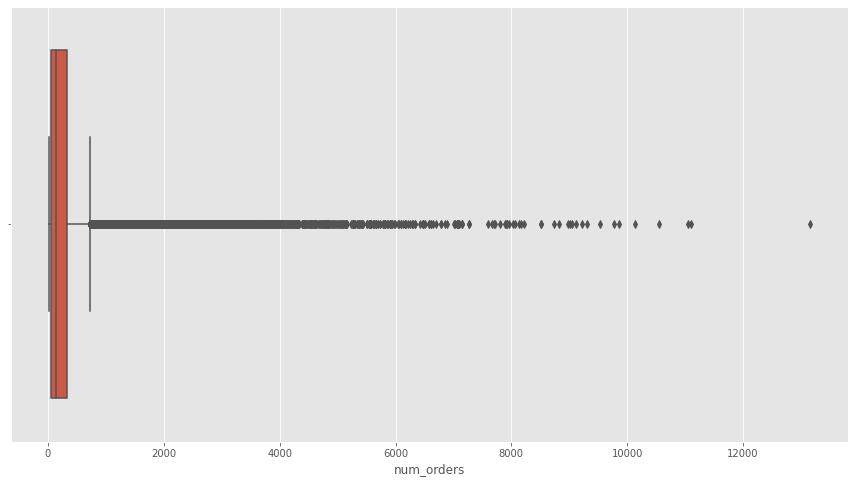

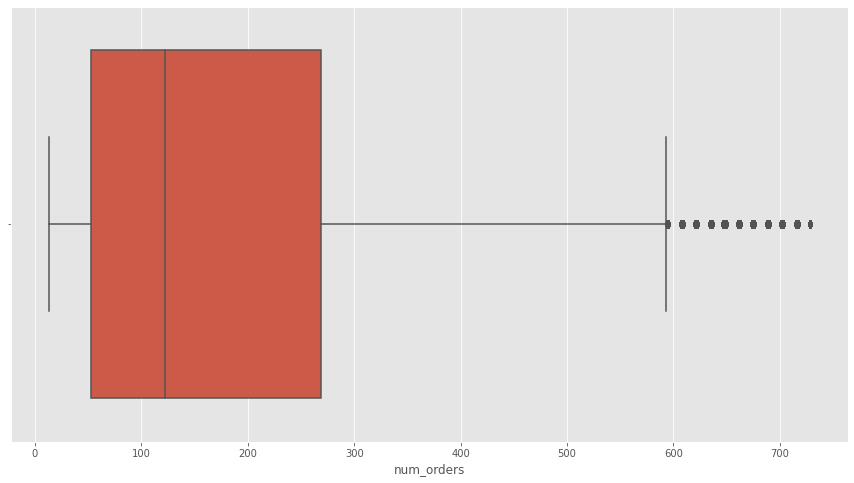

In [ ]:
# Alternative

%matplotlib inline
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score
import numpy as np
from sklearn.model_selection import StratifiedKFold  #for classifier
from sklearn.model_selection import KFold #for regression
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import train_test_split
from sklearn import metrics
from matplotlib import style
import itertools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
t1=time.time()
train1=pd.read_csv('/content/drive/My Drive/food/train.csv')
train2=pd.read_csv('/content/drive/My Drive/food/fulfilment_center_info.csv')
train3=pd.read_csv('/content/drive/My Drive/food/meal_info.csv')
test1=pd.read_csv('/content/drive/My Drive/food/test.csv')
my=train1.merge(train2)
train4=my.merge(train3)
my2=test1.merge(train2)
test2=my2.merge(train3)
df1=train4
df1['year']=df1['week']%52
df2=test2
df2['year']=df2['week']%52
# target=train4['num_orders']
catogorical_features1=df1.select_dtypes(include=[np.object])
for feature in catogorical_features1.columns:
  df1 = pd.concat([df1,pd.get_dummies(df1[feature],prefix=feature,drop_first=True)],axis=1)
  df1.drop(feature, axis=1, inplace=True)
catogorical_features2=df2.select_dtypes(include=[np.object])
for feature in catogorical_features2.columns:
  df2 = pd.concat([df2,pd.get_dummies(df2[feature],prefix=feature,drop_first=True)],axis=1)
  df2.drop(feature, axis=1, inplace=True) 

# numeric_features1=df1.select_dtypes(include=[np.number])
# print(len(numeric_features1.columns))
# numeric_features2=df2.select_dtypes(include=[np.number])
# len(numeric_features2.columns)
# print(df1['week'].unique())
# print(df2['week'].unique())
df3=df1[df1['week']>41]
df3.head()
# print(df3['week'].unique())

df4=df3.drop(['year','category_Seafood','category_Pizza','base_price','cuisine_Thai','cuisine_Italian','cuisine_Indian'],axis=1) #train
df5=df2.drop(['year','category_Seafood','category_Pizza','base_price','cuisine_Thai','cuisine_Italian','cuisine_Indian'],axis=1) #test

from statsmodels.stats.outliers_influence import variance_inflation_factor 
from statsmodels.tools.tools import add_constant

def calculate_vif_(df, thresh=5):
    '''
    Calculates VIF each feature in a pandas dataframe
    A constant must be added to variance_inflation_factor or the results will be incorrect

    :param df: the pandas dataframe containing only the predictor features, not the response variable
    :param thresh: the max VIF value before the feature is removed from the dataframe
    :return: dataframe with features removed
    '''
    const = add_constant(df)
    cols = const.columns
    variables = np.arange(const.shape[1])
    vif_df = pd.Series([variance_inflation_factor(const.values, i) 
               for i in range(const.shape[1])], 
              index=const.columns).to_frame()

    vif_df = vif_df.sort_values(by=0, ascending=False).rename(columns={0: 'VIF'})
    vif_df = vif_df.drop('const')
    vif_df = vif_df[vif_df['VIF'] > thresh]

    print('Features above VIF threshold:\n')
    print(vif_df[vif_df['VIF'] > thresh])

    col_to_drop = list(vif_df.index)

    for i in col_to_drop:
        print ('Dropping: {}'.format(i))
        df = df.drop(columns=i)

    return df.head()
calculate_vif_(df4)
calculate_vif_(df5)

plt.figure(figsize=(15,8))
sns.boxplot(df4['num_orders'])
Q1=df4['num_orders'].quantile(.25)
Q3=df4['num_orders'].quantile(.75)
IQR=Q3-Q1
upper_limit=Q3+1.5*IQR
lower_limit=Q1-1.5*IQR
df4.drop(df4[(df4['num_orders']>=upper_limit) | (df4['num_orders']<=lower_limit)].index,axis=0,inplace=True)
plt.figure(figsize=(15,8))
sns.boxplot(df4['num_orders'])


def performance(): 
  pred1 = model.predict(x_train)
  pred = model.predict(x_test)
  real = [y_train, y_test] 
  est = [pred1, pred]
  nam=["Model performance in Train Data","Model performance in Test Data"] 
  for (a, b,c) in zip(real, est,nam):
    print(c)
    # Measure MSE error. 
    score = metrics.mean_squared_error(a,b)
    print("Final score (MSE): {}".format(score))
    # Measure RMSE error.  RMSE is common for regression.
    score = np.sqrt(metrics.mean_squared_error(a,b))
    print("Final score (RMSE): {}".format(score))
    print("Final score (R^2):",metrics.r2_score(a,b))
    errors = abs(b - a)
    mape = 100 * np.mean(errors / a)
    accuracy = 100 - mape
    print('Average Error: {:0.4f}'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%'.format(accuracy))

  plt.rcParams['agg.path.chunksize'] = 10000
  style.use('ggplot')
  

  fig = plt.figure()
  ax1 = fig.add_subplot(111)
  ax1.scatter(y_train,pred1, s=10, c='b',marker='s', label='Train Data')
  ax1.scatter(y_test,pred, s=10, c='r',marker='+' , label='Test Data')
  plt.xlabel('True values')
  plt.ylabel('Predictions')
  plt.legend(loc='upper left');
  plt.show()
df6=df4.drop(['num_orders'],axis=1)
# from scipy.stats import zscore
from sklearn import preprocessing
# # Standardize ranges
# for x in df6: 
#   df6[x] = zscore(df6[x])
#   df5[x] = zscore(df5[x])
  

df6 = preprocessing.normalize(df6)
df6  
target1=df4['num_orders']

x_train, x_test, y_train, y_test = train_test_split(df6,target1, test_size=0.2)
#test set = df5 

Model performance in Train Data
Final score (MSE): 1048.5842727706543
Final score (RMSE): 32.3818509781429
Final score (R^2): 0.9632587563850563
Average Error: 22.0622
Accuracy = 76.73%
Model performance in Test Data
Final score (MSE): 7528.915820932214
Final score (RMSE): 86.7693253456094
Final score (R^2): 0.734429506242642
Average Error: 59.7182
Accuracy = 36.93%


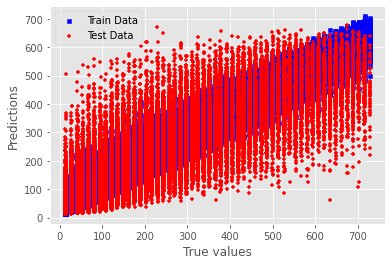

In [ ]:


# Random Forest
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor()      
model.fit(x_train,y_train)
performance()

In [ ]:
y_pred=model.predict(df5)
sub=pd.DataFrame({'id':test1['id'],'num_orders':[int(round(x)) for x in y_pred]})
sub.head(10)

,id,num_orders
0,1028232,80
1,1127204,80
2,1212707,80
3,1082698,80
4,1400926,80
5,1284113,80
6,1197966,80
7,1132739,80
8,1057981,80
9,1095932,218


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

Model performance in Train Data
Final score (MSE): 42396.43346836275
Final score (RMSE): 205.90394233322186
Final score (R^2): 0.01860560641538067
Average Error: 177.5134
Accuracy = -57.22%
Model performance in Test Data
Final score (MSE): 61441.50777292774
Final score (RMSE): 247.87397558623968
Final score (R^2): -1.1672511613275849
Average Error: 224.1094
Accuracy = -398.26%


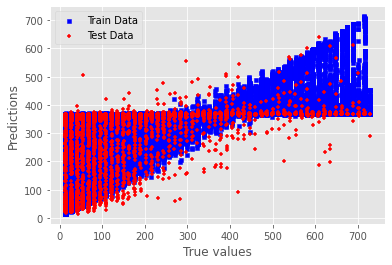

In [ ]:
from imblearn.over_sampling import SMOTE
smt = SMOTE()
x_train, y_train = smt.fit_sample(x_train, y_train)
# x_test, y_test = smt.fit_sample(x_test, y_test)
# Random Forest
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor()      
model.fit(x_train,y_train)
performance()

In [ ]:
y_pred=model.predict(df5)
sub=pd.DataFrame({'id':test1['id'],'num_orders':[int(round(x)) for x in y_pred]})
sub

,id,num_orders
45,1271440,100
46,1269834,100
47,1176823,100
48,1193098,100
49,1034878,104
50,1010243,104
51,1451807,104
52,1016845,104
53,1198021,104
54,1413802,101


In [ ]:
sub.to_csv('/content/drive/My Drive/food/foodrf80.csv',index=False)

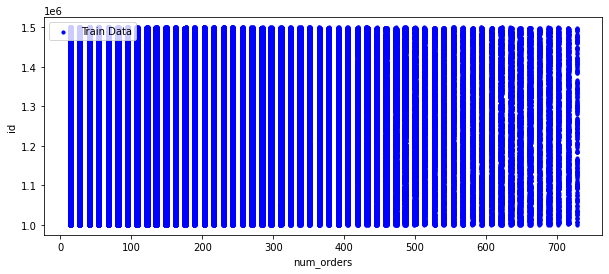

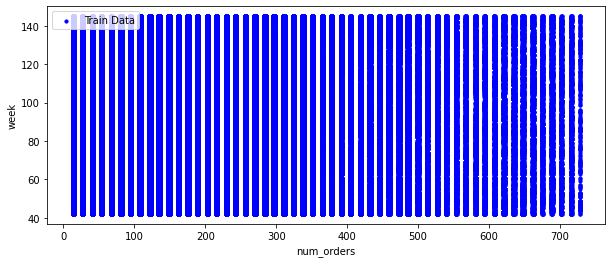

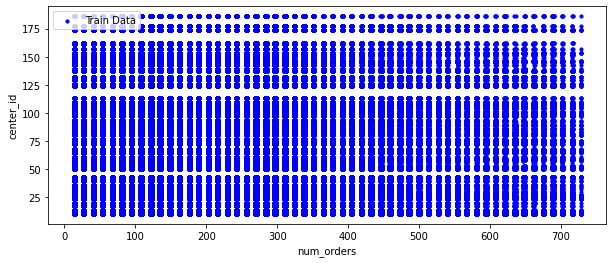

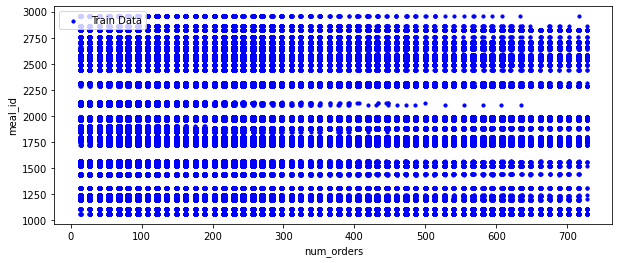

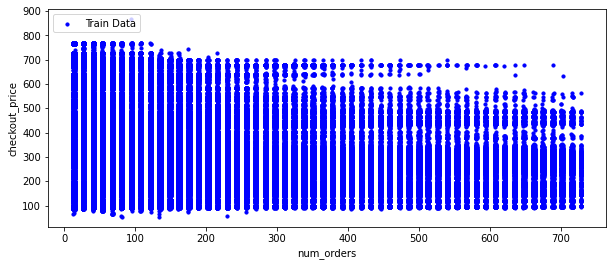

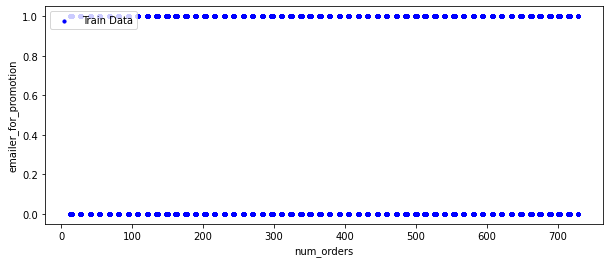

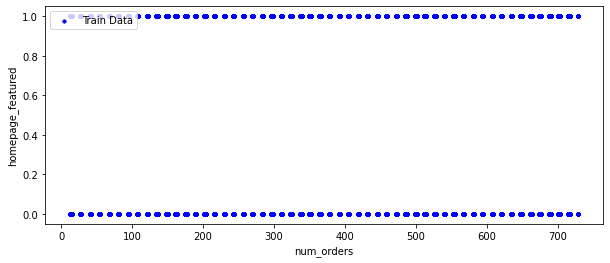

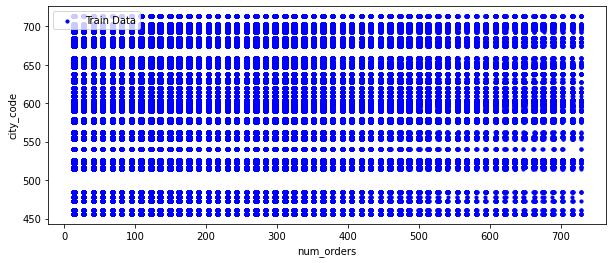

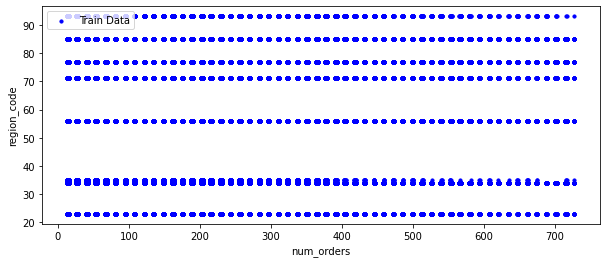

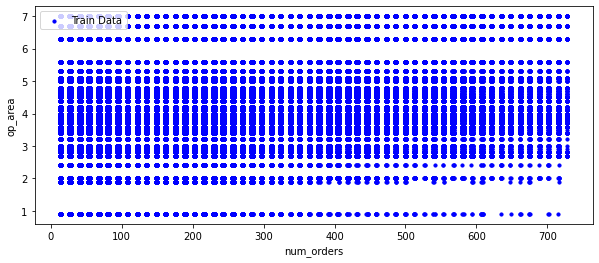

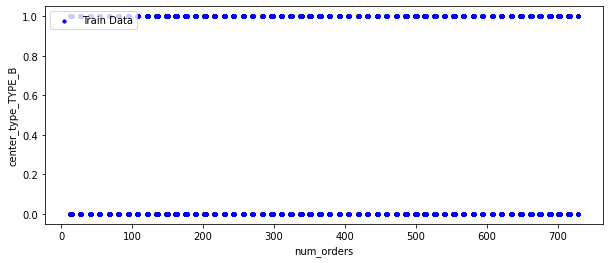

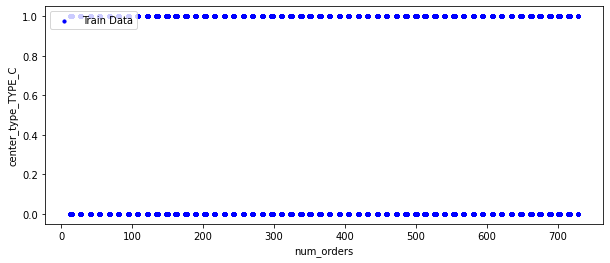

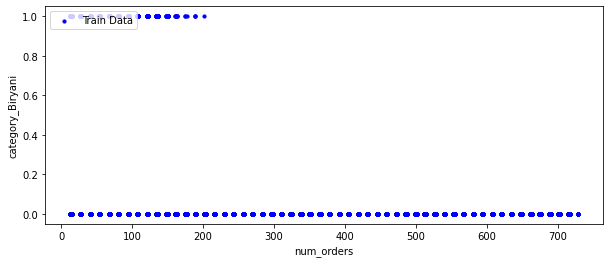

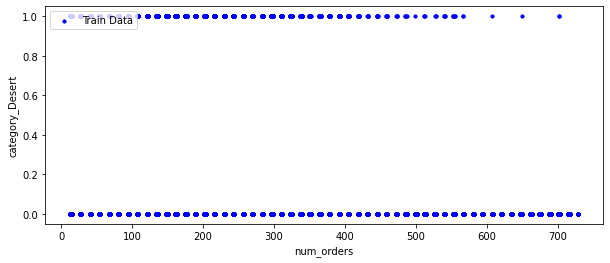

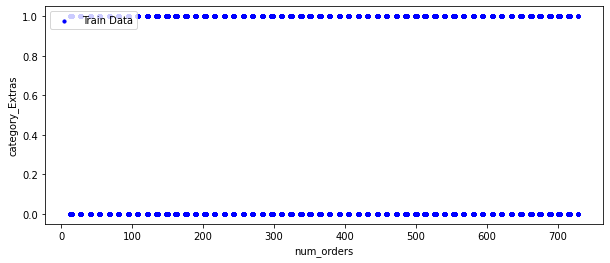

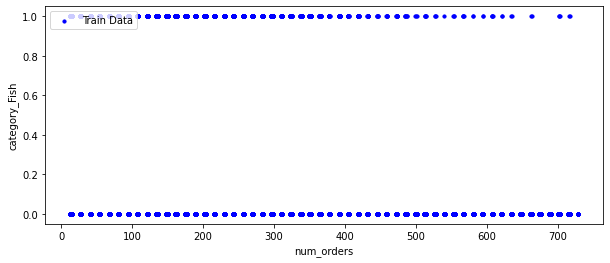

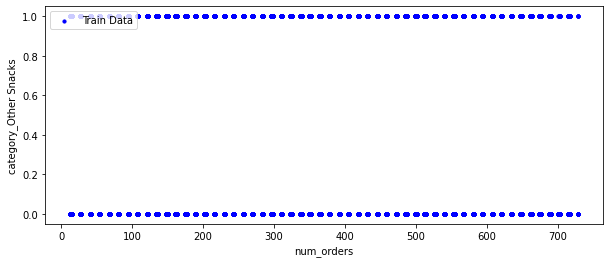

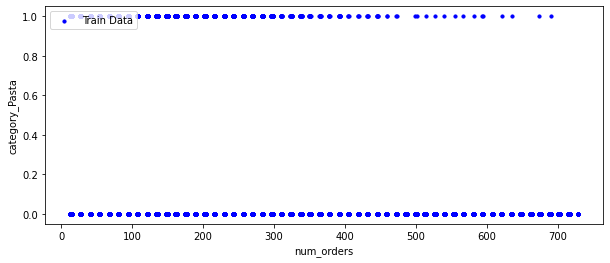

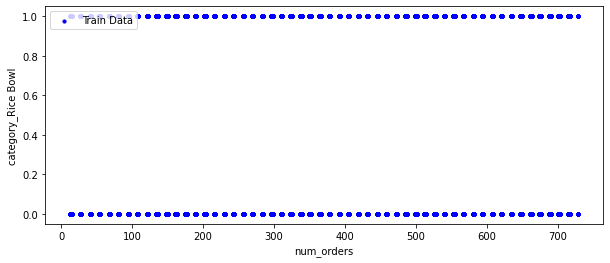

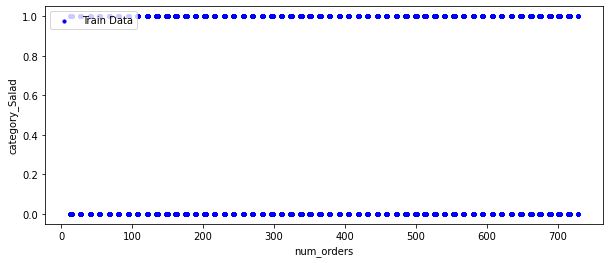

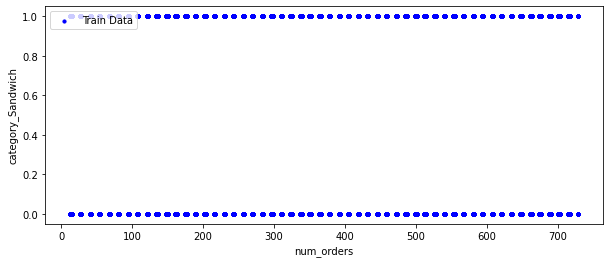

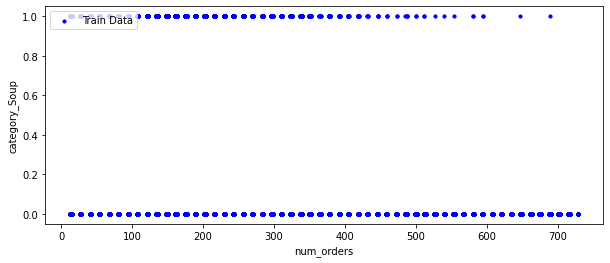

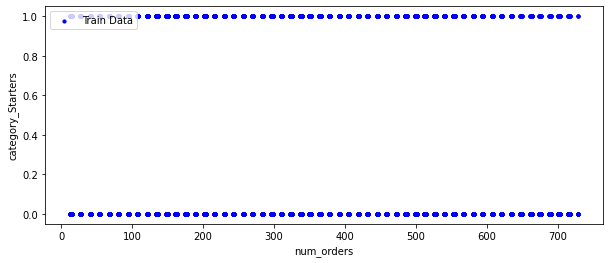

In [ ]:
for x in df6.columns:
  # plt.scatter(df6[x],pd.DataFrame(target1))
  # plt.show()
# print(len(df6))  
# len(target1)
  fig = plt.figure(figsize=(10,4))
  ax1 = fig.add_subplot(111)
  ax1.scatter(pd.DataFrame(target1),df6[x], s=10, c='b', label='Train Data')
  # ax1.scatter(y_test,pred, s=10, c='r', label='Test Data')
  plt.xlabel('num_orders')
  plt.ylabel(f'{x}')
  plt.legend(loc='upper left');
  plt.show()

Model performance in Train Data
Final score (MSE): 5598.462585849961
Final score (RMSE): 74.82287474997176
Final score (R^2): 0.8036558675240894
Average Error: 53.6416
Accuracy = 40.57%
Model performance in Test Data
Final score (MSE): 5985.046867779252
Final score (RMSE): 77.36308465786026
Final score (R^2): 0.789662894054763
Average Error: 55.2772
Accuracy = 38.81%


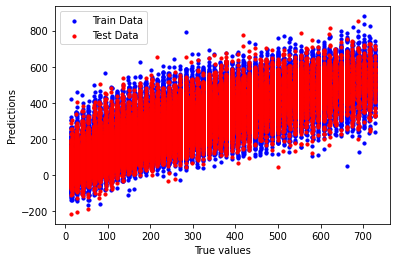

In [ ]:
# Gradient Boosting
gradreg=GradientBoostingRegressor(max_depth=3,n_estimators=800,learning_rate=0.9)
amodel=gradreg.fit(x_train,y_train)
performance()

Model performance in Train Data
Final score (MSE): 16457.22060396883
Final score (RMSE): 128.2856991405076
Final score (R^2): 0.4228274900652267
Average Error: 94.9670
Accuracy = -20.05%
Model performance in Test Data
Final score (MSE): 16533.95874088831
Final score (RMSE): 128.584442063915
Final score (R^2): 0.4189343695704757
Average Error: 95.1560
Accuracy = -20.30%


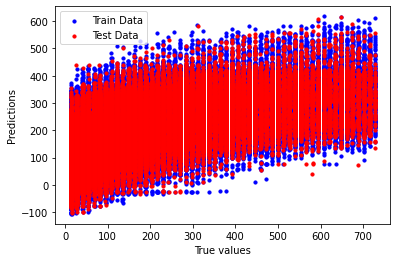

In [ ]:
#linear model
# Now to set up the linear regression model
# Create linear regression object
from sklearn import linear_model
model = linear_model.LinearRegression(fit_intercept=True)
# ... then fir it
model.fit(x_train,y_train)
performance()

[13:27:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Model performance in Train Data
Final score (MSE): 8567.340852863927
Final score (RMSE): 92.5599311412013
Final score (R^2): 0.6995340985876015
Average Error: 65.8082
Accuracy = 26.74%
Model performance in Test Data
Final score (MSE): 8705.384485248409
Final score (RMSE): 93.30264993690378
Final score (R^2): 0.6940599766017985
Average Error: 66.2975
Accuracy = 26.17%


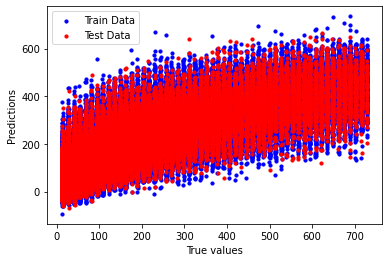

In [ ]:
import xgboost
xg=xgboost.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1, max_depth = 5, alpha = 10, n_estimators = 200)      
model=xg.fit(x_train,y_train)
performance()

Model performance in Train Data
Final score (MSE): 2706.941292281227
Final score (RMSE): 52.028273969844776
Final score (R^2): 0.9051073437967928
Average Error: 36.7628
Accuracy = 56.67%
Model performance in Test Data
Final score (MSE): 6788.285542436854
Final score (RMSE): 82.3910525629868
Final score (R^2): 0.760989137486707
Average Error: 57.2711
Accuracy = 38.28%


AttributeError: ignored

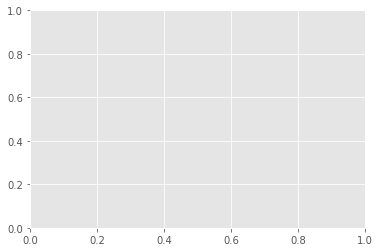

In [ ]:
import lightgbm
lg=lightgbm.LGBMRegressor(num_leaves=100,learning_rate=0.07, n_estimators=3200)
model=lg.fit(x_train,y_train)
performance()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to c

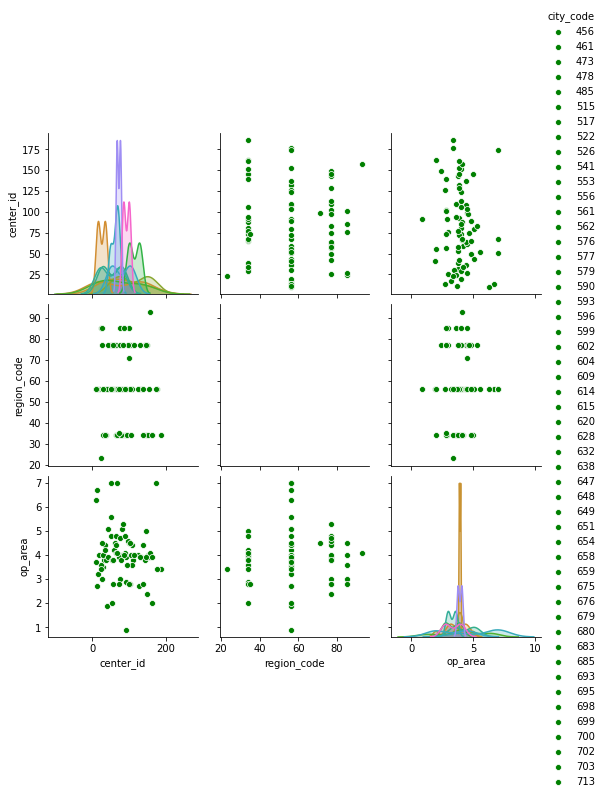

In [ ]:
# for t in df1.columns[12:]:
#   ax = sns.lmplot(x=t, y="num_orders",data=df1,height=4)

# Example 1 - running on all dataframe - green color
g = sns.pairplot(train2, plot_kws={'color':'green'},hue = 'city_code')

In [ ]:
pd.DataFrame(x_test).columns

RangeIndex(start=0, stop=23, step=1)

In [ ]:
y_pred=model.predict(df5)
sub=pd.DataFrame({'id':test1['id'],'num_orders':[int(round(x)) for x in y_pred]})
sub.to_csv('/content/drive/My Drive/food/lg85.csv',index=False)
sub.head()

,id,num_orders
0,1028232,207
1,1127204,238
2,1212707,252
3,1082698,227
4,1400926,258


In [ ]:
sub[sub['num_orders']<=0]=185
len(sub[sub['num_orders']<=0])
len(sub[sub['num_orders']==185])

sub.to_csv('/content/drive/My Drive/food/lg85r.csv',index=False)

In [ ]:
(test1['id']==sub['id']).count()

32573

count    311191.000000
mean        181.694789
std         168.824915
min          13.000000
25%          53.000000
50%         122.000000
75%         269.000000
max         728.000000
Name: num_orders, dtype: float64

In [ ]:
! pip install CatBoostRegressor
# import CatBoostRegressor
# cr=CatBoostRegressor.fit(x_train,y_train)
# performance()

ERROR: Could not find a version that satisfies the requirement CatBoostRegressor (from versions: none)
ERROR: No matching distribution found for CatBoostRegressor


In [ ]:
#Let's go instantiate, fit and predict.
gbrt=GradientBoostingRegressor(n_estimators=100)
gbrt.fit(x_train, y_train)
y_pred=gbrt.predict(x_test)

In [ ]:
%matplotlib inline
import matplotlib.pylab as plt
import numpy as np
from scipy import sparse
from sklearn.datasets import make_classification, make_blobs, load_boston, fetch_california_housing
from sklearn.decomposition import PCA
from sklearn.model_selection import ShuffleSplit, train_test_split
from sklearn import metrics
from sklearn.model_selection import learning_curve
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from pprint import pprint
import pandas as pd
from pandas.plotting import scatter_matrix
import urllib
import requests
import zipfile
# import StringIO
from io import StringIO
import seaborn

#All right let's do this the right way. We'll use a cross-validation generator to select train and CV datasets to finetune
#parameters such as C (Regularization parameter we saw earlier). These hyperparameters are extremely critical to the model.
#Now, if we tune parameters against the Test dataset, we will end up biasing towards the test set and will once again
#not generalize very well. We will also have no good way to find out since we have essentially trained on all our data.

#Luckily scikit-learn has builit-in packages that can help with this. We'll use a crossvalidation generator that
#can train the model by tuning the parameters based on a cross-validation subset (cv) that is picked from within the 
#training set. A different cv subset will be picked for each iteration, we control the number of iterations. Then we will 
#use these cv/train splits and run a gridsearch function that will evaluate the model with each split and tune parameters 
#to give us the best parameter that gives the optimal result.

#Defining this as a function so we can call it anytime we want

def GradientBooster(param_grid, n_jobs):

    estimator = GradientBoostingRegressor()

#Choose cross-validation generator - let's choose ShuffleSplit which randomly shuffles and selects Train and CV sets
#for each iteration. There are other methods like the KFold split.
    cv = ShuffleSplit(x_train.shape[0], test_size=0.2)

#Apply the cross-validation iterator on the Training set using GridSearchCV. This will run the classifier on the 
#different train/cv splits using parameters specified and return the model that has the best results

#Note that we are tuning based on the F1 score 2PR/P+R where P is Precision and R is Recall. This may not always be
#the best score to tune our model on. I will explore this area further in a seperate exercise. For now, we'll use F1.

    classifier = GridSearchCV(estimator=estimator, cv=cv, param_grid=param_grid, n_jobs=n_jobs)

#Also note that we're feeding multiple neighbors to the GridSearch to try out.

#We'll now fit the training dataset to this classifier
    classifier.fit(x_train, y_train)

#Let's look at the best estimator that was found by GridSearchCV
    print ("Best Estimator learned through GridSearch")
    print (classifier.best_estimator_)
    
    return cv, classifier.best_estimator_


In [ ]:
#Below is a plot_learning_curve module that's provided by scikit-learn. It allows us to quickly and easily visualize how
#well the model is performing based on number of samples we're training on. It helps to understand situations such as 
#high variance or bias.

#We'll call this module in the next segment. 

print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
# from sklearn import cross_validation
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import load_digits
# from sklearn.learning_curve import learning_curve


def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and traning learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : integer, cross-validation generator, optional
        If an integer is passed, it is the number of folds (defaults to 3).
        Specific cross-validation objects can be passed, see
        sklearn.cross_validation module for the list of possible objects

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt


Automatically created module for IPython interactive environment


In [ ]:
#WARNING - THIS MIGHT TAKE A WHILE TO RUN. TRY ADJUSTING parameters such as n_jobs (jobs to run in parallel, before 
#increasing this make sure your system can handle it), n_iter for ShuffleSplit (in the function definition) and reducing 
#number of values being tried for max_depth/n_estimators.

#SELECT INTERRUPT IN THE MENU AND PRESS INTERRUPT KERNEL IF YOU NEEDD TO STOP EXECUTION

param_grid={'n_estimators':[100], 
            'learning_rate': [0.1],# 0.05, 0.02, 0.01],
            'max_depth':[6],#4,6], 
            'min_samples_leaf':[3],#,5,9,17], 
            'max_features':[1.0],#,0.3]#,0.1]
           }
n_jobs=4

#Let's fit GBRT to the digits training dataset by calling the function we just created.
cv,best_est=GradientBooster(param_grid, n_jobs)
# Best Estimator learned through GridSearch
GradientBoostingRegressor(alpha=0.9, init=None, learning_rate=0.1, loss='ls',
             max_depth=6, max_features=1.0, max_leaf_nodes=None,
             min_samples_leaf=3, min_samples_split=2, n_estimators=100,
             random_state=None, subsample=1.0, verbose=0, warm_start=False)


In [ ]:
#OK great, so we got back the best estimator parameters as follows:
print ("Best Estimator Parameters")
print("---------------------------")
print ("n_estimators: %d" %best_est.n_estimators)
print ("max_depth: %d" %best_est.max_depth)
print ("Learning Rate: %.1f" %best_est.learning_rate)
print ("min_samples_leaf: %d" %best_est.min_samples_leaf)
print ("max_features: %.1f" %best_est.max_features)

print ("Train R-squared: %.2f" %best_est.score(x_train,y_train))

#Each of these parameters is critical to learning. Some of them will help address overfitting issues as well. For more 
#info about overfitting and regularization, check out the SVM notebook in my Github repos where I provide more info on 
#the subject.


In [ ]:
#OK we'll now call the plot_learning_curve module by feeding it the estimator (best estimator returned from GS) 
#and train/cv sets.

#The module simply runs the estimator multiple times on subsets of the data provided and plots the train and cv scores.
#Note that we're feeding the best parameters we've learned from GridSearchCV to the estimator now.
#We may need to adjust the hyperparameters further if there is overfitting (or underfitting, though unlikely)
title = "Learning Curves (Gradient Boosted Regression Trees)" 
estimator = GradientBoostingRegressor(n_estimators=best_est.n_estimators, max_depth=best_est.max_depth,
                                      learning_rate=best_est.learning_rate, min_samples_leaf=best_est.min_samples_leaf,
                                      max_features=best_est.max_features)
plot_learning_curve(estimator, title, x_train, y_train, cv=cv)
plt.show()

#Looks like we've done a reasonable job getting about ~0.85 R-squared on the cv set and looks from the learning
#curve that we may be able to do a bit better with more estimators. Although we may need to reduce the learning rate even 
#further to address any overfitting.


In [ ]:

#OK we'll now call the plot_learning_curve module by feeding it the estimator (best estimator returned from GS) 
#and train/cv sets.

#The module simply runs the estimator multiple times on subsets of the data provided and plots the train and cv scores.
#Note that we're feeding the best parameters we've learned from GridSearchCV to the estimator now.
#We may need to adjust the hyperparameters further if there is overfitting (or underfitting, though unlikely)
title = "Learning Curves (Gradient Boosted Regression Trees)" 
estimator = GradientBoostingRegressor(n_estimators=1000, max_depth=best_est.max_depth,
                                      learning_rate=best_est.learning_rate, min_samples_leaf=best_est.min_samples_leaf,
                                      max_features=best_est.max_features)
plot_learning_curve(estimator, title, x_train, y_train, cv=cv)
plt.show()

#OK that didn't really help. It did improve the training score but there's way more overfitting (look at the wide gap b/w
#train and cv curves). This possibly could be addressed by further reducing learning rate. But also note that the cv scores 
#are pretty much the same, so we might not see a major improvement unless we can procure more samples.


In [ ]:
#Let's try one more trick. We'll trim the training set to its most important features and re-train to see if 
#that helps.
title = "Learning Curves (Gradient Boosted Regression Trees)" 

#Dropping all parameters except n_estimators and learning_rate since we're going to trim the features anyway.
estimator = GradientBoostingRegressor(n_estimators=best_est.n_estimators, learning_rate=best_est.learning_rate)

#Calling fit on the estimator so we can transform the X matrices.
estimator.fit(x_train, y_train)

#Trimming feature matrices to include only those features that are more important than the mean of all importances.
x_train_trim=estimator.transform(x_train, threshold='mean')

#Trimming test as well in case we end up going with this model as final.
x_test_trim=estimator.transform(x_test, threshold='mean')

#Re-plotting Learning cruves.
plot_learning_curve(estimator, title, x_train, y_train, cv=cv)
plt.show()

#So what do we infer from this plot? We seem to have addressed overfitting much better but the overall score of both train
#and cv has gone down considerably, indicating that the features we dropped were actually collectively contributing
#to the model. Let's go back to the first model that the Grid Search returned and run our test scores.


In [ ]:
#Switching back to the best model from gridsearch
estimator = best_est

#Re-fitting to the train set
estimator.fit(x_train, y_train)

#Calculating train/test scores - R-squared value
print ("Train R-squared: %.2f" %estimator.score(x_train, y_train))
print ("Test R-squared: %.2f" %estimator.score(x_test, y_test))

#There you have it, our final R-squared on the California housing dataset, 0.82


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 300, stop = 1200, num = 20)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 15, num = 10)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5,8]
# Minimum number of samples required at each leaf node
min_samples_leaf = [2, 3,5]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=1, random_state=42)
# Fit the random search model
rf_random.fit(x_train, y_train)
rf_random.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed: 161.1min finished


{'bootstrap': False,
 'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 678}

In [ ]:
def evaluate(new_model, x_test, y_test):
    predictions = new_model.predict(x_test)
    errors = abs(predictions - y_test)
    mape = 100 * np.mean(errors / y_test)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy
# base_model = RandomForestRegressor(n_estimators = 10, random_state = 42)
# base_model.fit(x_train, y_train)
print('Base Model Performance')
base_accuracy = evaluate(model, x_test, y_test)
# Average Error: 3.9199 degrees.
# Accuracy = 93.36%.
print('Random Model Performance')
best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, x_test, y_test)
# Average Error: 3.7152 degrees.
# Accuracy = 93.73%.
print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))
# Improvement of 0.40%.

Base Model Performance
Model Performance
Average Error: 47.8532 degrees.
Accuracy = 43.65%.
Random Model Performance


NameError: ignored

In [ ]:
import itertools  
  
num = ['x_train', 'x_test'] 
color = ['pred1', 'pred'] 
# value = [255, 256] 
    
for (a, b) in zip(num, color): 
  if a=='x_train':
    print('train')
    #  print (type(a), b) 

train


In [ ]:
# pred1 = model.predict(x_train)
# pred = model.predict(x_test)
# real = [y_train, y_test] 
# est = [pred1, pred]
# nam=['For Train Model','For Test Model']
# print(type(real))
# for (a, b,c) in zip(real, est,nam):
def performance():  
  pred1 = model.predict(x_train)
  pred = model.predict(x_test)
  real = [y_train, y_test] 
  est = [pred1, pred]
  nam=["Model performance in Train Data","Model performance in Test Data"]
  for (a, b,c) in zip(real, est,nam):
    print(c)
    # Measure MSE error. 
    score = metrics.mean_squared_error(a,b)
    print("Final score (MSE): {}".format(score))
    # Measure RMSE error.  RMSE is common for regression.
    score = np.sqrt(metrics.mean_squared_error(a,b))
    print("Final score (RMSE): {}".format(score))
    print("Final score (R^2):",metrics.r2_score(a,b))
    errors = abs(b - a)
    mape = 100 * np.mean(errors / a)
    accuracy = 100 - mape
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
def plot():
    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    ax1.scatter(y_train,pred1, s=10, c='b', label='Train Data')
    ax1.scatter(y_test,pred, s=10, c='r', label='Test Data')
    plt.xlabel('True values')
    plt.ylabel('Predictions')
    plt.legend(loc='upper left');
    plt.show()

In [ ]:
performance()
plot()

In [ ]:
performance()

In [ ]:
# Regression chart.
def chart_regression(pred, y, sort=True):
    t = pd.DataFrame({'pred': pred, 'y': y})
    if sort:
        t.sort_values(by=['y'], inplace=True)
    plt.plot(t['y'], label='expected')
    plt.plot(t['pred'], label='prediction')
    plt.ylabel('output')
    plt.legend()
    plt.show()
# Plot the chart
chart_regression(model.predict(x_test),y_test) 

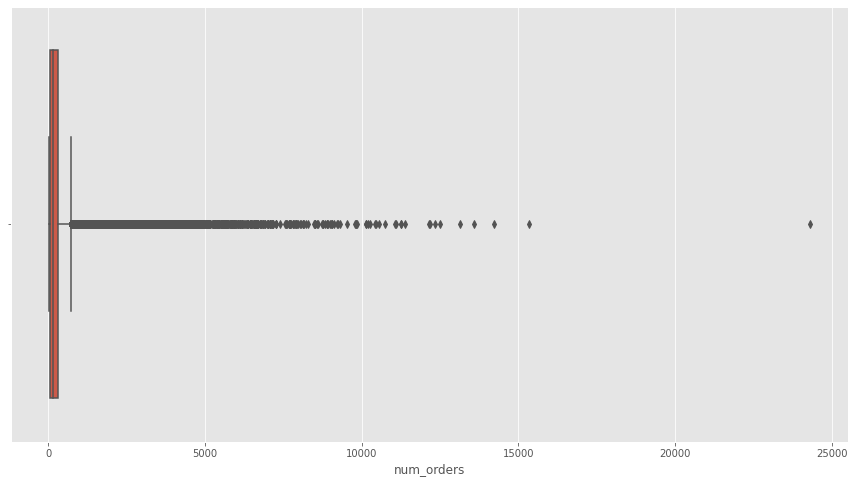

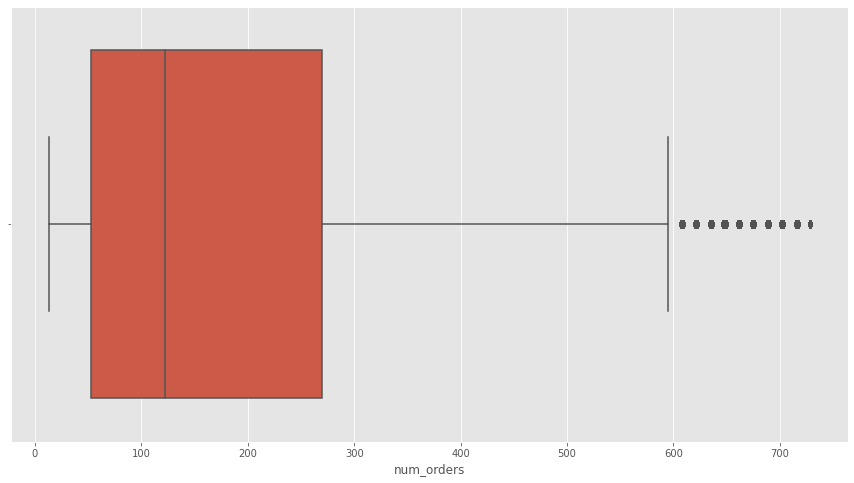

In [ ]:
# Alternative222222

%matplotlib inline
from sklearn.ensemble import GradientBoostingRegressor
import numpy as np
from sklearn.model_selection import StratifiedKFold  #for classifier
from sklearn.model_selection import KFold #for regression
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import r2_score
from matplotlib import style
import itertools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from matplotlib import style
def performance(): 
  pred1 = model.predict(x_train)
  pred = model.predict(x_test)
  real = [y_train, y_test] 
  est = [pred1, pred]
  nam=["Model performance in Train Data","Model performance in Test Data"] 
  for (a, b,c) in zip(real, est,nam):
    print(c)
    # Measure MSE error. 
    score = metrics.mean_squared_error(a,b)
    print("Final score (MSE): {}".format(score))
    # Measure RMSE error.  RMSE is common for regression.
    score = np.sqrt(metrics.mean_squared_error(a,b))
    print("Final score (RMSE): {}".format(score))
    print("Final score (R^2):",metrics.r2_score(a,b))
    errors = abs(b - a)
    mape = 100 * np.mean(errors / a)
    accuracy = 100 - mape
    print('Average Error: {:0.4f}'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%'.format(accuracy))

  plt.rcParams['agg.path.chunksize'] = 10000
  style.use('ggplot')
  

  fig = plt.figure()
  ax1 = fig.add_subplot(111)
  ax1.scatter(y_train,pred1, s=10, c='b',marker='s', label='Train Data')
  ax1.scatter(y_test,pred, s=10, c='r',marker='+' , label='Test Data')
  plt.xlabel('True values')
  plt.ylabel('Predictions')
  plt.legend(loc='upper left');
  plt.show()
t1=time.time()
train1=pd.read_csv('/content/drive/My Drive/food/train.csv')
train2=pd.read_csv('/content/drive/My Drive/food/fulfilment_center_info.csv')
train3=pd.read_csv('/content/drive/My Drive/food/meal_info.csv')
test1=pd.read_csv('/content/drive/My Drive/food/test.csv')
my=train1.merge(train2)
train4=my.merge(train3)
my2=test1.merge(train2)
test2=my2.merge(train3)
df1=train4
df2=test2
plt.figure(figsize=(15,8))
sns.boxplot(df1['num_orders'])
Q1=df1['num_orders'].quantile(.25)
Q3=df1['num_orders'].quantile(.75)
IQR=Q3-Q1
upper_limit=Q3+1.5*IQR
lower_limit=Q1-1.5*IQR
df1.drop(df1[(df1['num_orders']>=upper_limit) | (df1['num_orders']<=lower_limit)].index,axis=0,inplace=True)
plt.figure(figsize=(15,8))
sns.boxplot(df1['num_orders'])
# df1=df1[['base_price','emailer_for_promotion','homepage_featured','center_type','op_area','category']]
# df2=df2[['base_price','emailer_for_promotion','homepage_featured','center_type','op_area','category']]
catogorical_features1=df1.select_dtypes(include=[np.object])
for feature in catogorical_features1.columns:
  df1 = pd.concat([df1,pd.get_dummies(df1[feature],prefix=feature,drop_first=True)],axis=1)
  df1.drop(feature, axis=1, inplace=True)
catogorical_features2=df2.select_dtypes(include=[np.object])
for feature in catogorical_features2.columns:
  df2 = pd.concat([df2,pd.get_dummies(df2[feature],prefix=feature,drop_first=True)],axis=1)
  df2.drop(feature, axis=1, inplace=True)
df4=df1.drop(['id','center_type_TYPE_B','category_Biryani','num_orders'],axis=1) #train
df5=df2.drop(['id','center_type_TYPE_B','category_Biryani'],axis=1)  #test
df3=train4['num_orders']  #target
x_train, x_test, y_train, y_test = train_test_split(df4,df3, test_size=0.2)

Model performance in Train Data
Final score (MSE): 722.6150661458903
Final score (RMSE): 26.8815004444672
Final score (R^2): 0.9746017320608477
Average Error: 18.2432
Accuracy = 81.87%
Model performance in Test Data
Final score (MSE): 5191.858446583579
Final score (RMSE): 72.05455187969446
Final score (R^2): 0.8191883138216075
Average Error: 49.4624
Accuracy = 51.13%


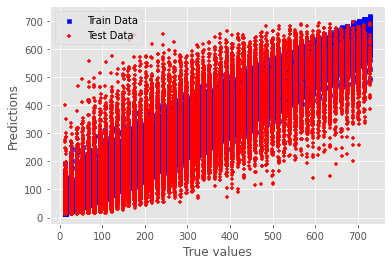

In [ ]:
# Random Forest
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor()      
model.fit(x_train,y_train)
performance()

In [ ]:
y_pred=model.predict(df5)
sub=pd.DataFrame({'id':test1['id'],'num_orders':[int(round(x)) for x in y_pred]})
sub.head()

Model performance in Train Data
Final score (MSE): 27079.425672473735
Final score (RMSE): 164.55827439686445
Final score (R^2): 0.37316433571497243
Average Error: 119.4407
Accuracy = 59.28%
Model performance in Test Data
Final score (MSE): 31702.911430650405
Final score (RMSE): 178.05311407175782
Final score (R^2): 0.26613969635989865
Average Error: 132.3260
Accuracy = 54.44%


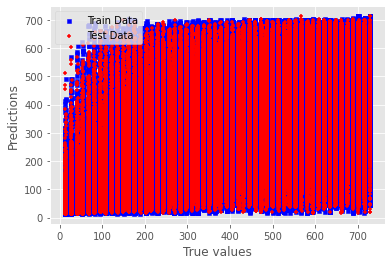

In [ ]:
from imblearn.over_sampling import SMOTE
smt = SMOTE()
x_train, y_train = smt.fit_sample(x_train, y_train)
# x_test, y_test = smt.fit_sample(x_test, y_test)
performance()
# accuracy_score(y_test, y_pred)

In [ ]:
y_pred=model.predict(df5)
sub=pd.DataFrame({'id':test1['id'],'num_orders':[int(round(x)) for x in y_pred]})
sub.head()

,id,num_orders
0,1028232,159
1,1127204,159
2,1212707,160
3,1082698,108
4,1400926,159


Model performance in Train Data
Final score (MSE): 6856.674731474341
Final score (RMSE): 82.80504049557817
Final score (R^2): 0.7604720162803578
Average Error: 54.6351
Accuracy = 36.85%
Model performance in Test Data
Final score (MSE): 21738.69795064188
Final score (RMSE): 147.44048952252524
Final score (R^2): 0.22372649408645917
Average Error: 101.1245
Accuracy = -26.68%


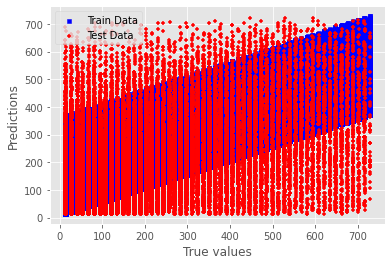

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor(n_neighbors=2)
model.fit(x_train, y_train)
performance()

In [ ]:
# df1=train1
# df1.set_index('meal_id',drop=True,inplace=True)
# df2=test1
# df2.set_index('meal_id',drop=True,inplace=True)
my=train1.merge(train2)
train4=my.merge(train3)
my2=test1.merge(train2)
test2=my2.merge(train3)

In [ ]:
df1=train4
df2=test2
plt.figure(figsize=(15,8))
sns.boxplot(df1['num_orders'])
Q1=df1['num_orders'].quantile(.25)
Q3=df1['num_orders'].quantile(.75)
IQR=Q3-Q1
upper_limit=Q3+1.5*IQR
lower_limit=Q1-1.5*IQR
df1.drop(df1[(df1['num_orders']>=upper_limit) | (df1['num_orders']<=lower_limit)].index,axis=0,inplace=True)
plt.figure(figsize=(15,8))
sns.boxplot(df1['num_orders'])

In [ ]:
df1['average']=(df1['checkout_price']+df1['base_price'])/2
df2['average']=(df2['checkout_price']+df2['base_price'])/2
df1['email_prom']=df1['emailer_for_promotion']+df1['homepage_featured']
df2['email_prom']=df2['emailer_for_promotion']+df2['homepage_featured']
dtrain=df1[['average','center_type','op_area','email_prom','cuisine']]
dtest=df2[['average','center_type','op_area','email_prom','cuisine']]
target=df1['num_orders']

In [ ]:
catogorical_features1=dtrain.select_dtypes(include=[np.object])
for feature in catogorical_features1.columns:
  dtrain = pd.concat([dtrain,pd.get_dummies(dtrain[feature],prefix=feature,drop_first=True)],axis=1)
  dtrain.drop(feature, axis=1, inplace=True)
catogorical_features2=dtest.select_dtypes(include=[np.object])
for feature in catogorical_features2.columns:
  dtest = pd.concat([dtest,pd.get_dummies(dtest[feature],prefix=feature,drop_first=True)],axis=1)
  dtest.drop(feature, axis=1, inplace=True) 

In [ ]:
trs = preprocessing.scale(dtrain)
tes = preprocessing.scale(dtest)
x_train, x_test, y_train, y_test = train_test_split(trs,target, test_size=0.2)

training score: 0.2206215898165128
test score:  0.22194751259971424
number of features used:  8
training score for alpha=0.01: 0.22105258843879771
test score for alpha =0.01:  0.22233266837861732
number of features used: for alpha =0.01: 8
training score for alpha=0.0001: 0.22105263216717175
test score for alpha =0.0001:  0.2223322589484774
number of features used: for alpha =0.0001: 8
LR training score: 0.22105263217153326
LR test score:  0.22233225437155713


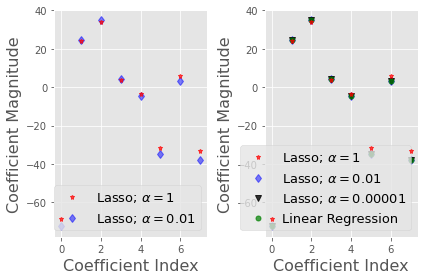

In [ ]:
import math 
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np
# difference of lasso and ridge regression is that some of the coefficients can be zero i.e. some of the features are 
# completely neglected
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_breast_cancer
# from sklearn.cross_ import train_test_split
# cancer = load_breast_cancer()
# #print cancer.keys()
# cancer_df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
# #print cancer_df.head(3)
# X = cancer.data
# Y = cancer.target
# X_train,X_test,y_train,y_test=train_test_split(X,Y, test_size=0.3, random_state=31)
lasso = Lasso()
model=lasso.fit(X_train,y_train)
train_score=lasso.score(X_train,y_train)
test_score=lasso.score(X_test,y_test)
coeff_used = np.sum(lasso.coef_!=0)
print("training score:", train_score)
print("test score: ", test_score)
print("number of features used: ", coeff_used)
lasso001 = Lasso(alpha=0.01, max_iter=10e5)
lasso001.fit(X_train,y_train)
train_score001=lasso001.score(X_train,y_train)
test_score001=lasso001.score(X_test,y_test)
coeff_used001 = np.sum(lasso001.coef_!=0)
print ("training score for alpha=0.01:", train_score001) 
print ("test score for alpha =0.01: ", test_score001)
print ("number of features used: for alpha =0.01:", coeff_used001)
lasso00001 = Lasso(alpha=0.0001, max_iter=10e5)
lasso00001.fit(X_train,y_train)
train_score00001=lasso00001.score(X_train,y_train)
test_score00001=lasso00001.score(X_test,y_test)
coeff_used00001 = np.sum(lasso00001.coef_!=0)
print ("training score for alpha=0.0001:", train_score00001) 
print ("test score for alpha =0.0001: ", test_score00001)
print ("number of features used: for alpha =0.0001:", coeff_used00001)
lr = LinearRegression()
lr.fit(X_train,y_train)
lr_train_score=lr.score(X_train,y_train)
lr_test_score=lr.score(X_test,y_test)
print ("LR training score:", lr_train_score) 
print ("LR test score: ", lr_test_score)
plt.subplot(1,2,1)
plt.plot(lasso.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Lasso; $\alpha = 1$',zorder=7) # alpha here is for transparency
plt.plot(lasso001.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Lasso; $\alpha = 0.01$') # alpha here is for transparency

plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc=4)
plt.subplot(1,2,2)
plt.plot(lasso.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Lasso; $\alpha = 1$',zorder=7) # alpha here is for transparency
plt.plot(lasso001.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Lasso; $\alpha = 0.01$') # alpha here is for transparency
plt.plot(lasso00001.coef_,alpha=0.8,linestyle='none',marker='v',markersize=6,color='black',label=r'Lasso; $\alpha = 0.00001$') # alpha here is for transparency
plt.plot(lr.coef_,alpha=0.7,linestyle='none',marker='o',markersize=5,color='green',label='Linear Regression',zorder=2)
plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc=4)
plt.tight_layout()
plt.show()

Model performance in Train Data
Final score (MSE): 22152.790463122506
Final score (RMSE): 148.83813511033557
Final score (R^2): 0.22105577914981767
Average Error: 113.6163
Accuracy = -66.51%
Model performance in Test Data
Final score (MSE): 22428.116421700262
Final score (RMSE): 149.76019638642393
Final score (R^2): 0.2202132775780533
Average Error: 114.0506
Accuracy = -65.66%


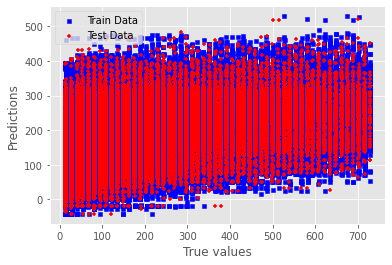

In [ ]:
performance()